In [0]:
import pandas as pd
import numpy as np

#Plots
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
#Nicer style
style.use('seaborn') 

#Wordcloud
from wordcloud import WordCloud, STOPWORDS

#Work with text
from nltk.tokenize import RegexpTokenizer
import re #regexp
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer 




#Progress bars
from tqdm import tqdm
# tqdm.pandas()

#Paralelize pandas apply on multiple cores
import swifter

import random

In [3]:
!pip install swifter

     |████████████████████████████████| 61kB 3.9MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4039 sha256=ae12fc54f0121e53f27ab43cf408cdbbb69e9603bbaa2ea64fa7c2fbdd6367e9
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


# TI-CNN

## Dataset description

The dataset was obtained from https://arxiv.org/abs/1806.00749. It contains true and false news obtained from reliable media such as the New York Times and the Getting Real About Fake News dataset.

In this Notebook the dataset will be analyzed to find interesting features

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
news= pd.read_csv('drive/My Drive/Colab Notebooks/fakenews-master/data/all_data.csv').sample(frac=0.9)
print(news.head)
#Select only relevant columns
news = news[['type', 'text', 'title']]
#Remove columns with NaNs 
news.loc[news['type']==1, 'type'] = 'real'
news.loc[news['type']==0, 'type'] = 'fake'

<bound method NDFrame.head of        Unnamed: 0  Unnamed: 0.1  ... second_all  third_all
1256         1257           NaN  ...        127         58
6939         6940           NaN  ...         19          3
12086       12087           NaN  ...         77         42
908           909           NaN  ...        163         64
3060         3061           NaN  ...         30         21
...           ...           ...  ...        ...        ...
19695       19696        3815.0  ...        131         35
16418       16419           NaN  ...         89         32
13995       13996           NaN  ...         74         25
1922         1923           NaN  ...         69         44
12751       12752           NaN  ...        489        236

[18014 rows x 54 columns]>


In [11]:
news.head(5)

,type,text,title
1256,real,WASHINGTON<U+2014>Another round of staff chang...,Pence Takes Reins as Trump Transition Team Is ...
6939,fake,Newsbusters : \nIn the twelve weeks since the ...,Media Kikes: 91% of Trump Coverage is Negative
12086,fake,Fighting Racism Where White Workers Are Hurtin...,Fighting Racism Where White Workers Are Hurtin...
908,real,"WASHINGTON <U+2014> The F.B.I. director, James...","Criticized by Candidates, Comey Has Tense Days..."
3060,real,"Throughout his presidential campaign, former A...",BREAKING: Trump Makes Massive Announcement Abo...


### Number of news by type

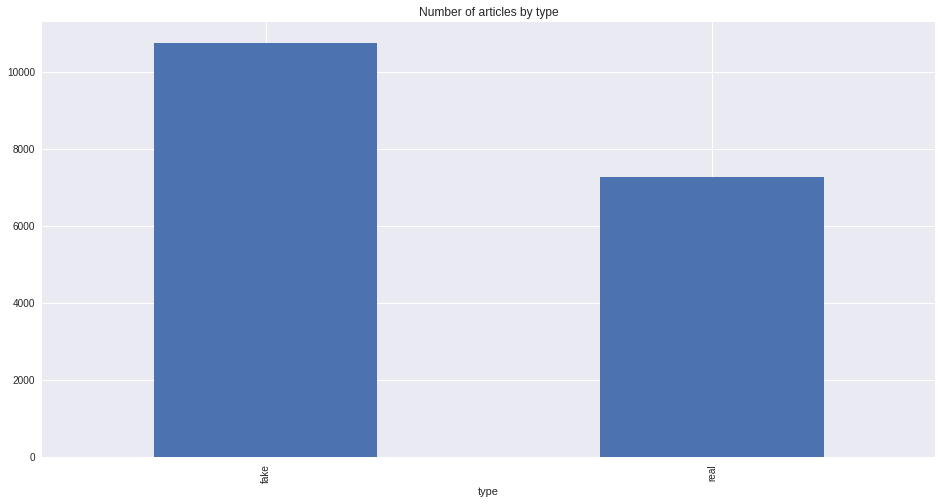

In [12]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.groupby("type").count()['text'].plot.bar(title = "Number of articles by type", ax = ax)


# Linguistic analysis

Auxiliary functions

In [0]:
stop_words = STOPWORDS.union(set(["will"]))
ps = PorterStemmer()

def clean_text(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word.lower() for word in tokens if word.isalpha()]    
    
    return ' '.join(words)


def clean_text_array(text):
    """ Same as clean_text but returns an array
    """
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word.lower() for word in tokens if word.isalpha()]  
    return words


def tokenize(text):
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    return tokens


def split_phrases(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    text = '. '.join(text.split("\n")).split(".")
    text = [x for x in text if x not in [".", "\n", "", " "]]
    return text


### Most frequent words by type of news


#### In the title

In [0]:
#extracting the extra spaces and making it as a array of words
corpus_text = [clean_text_array(i) for i in news[news['type'] == 'fake']['title'].tolist()]
# making M-D array into 1-D array
corpus_text = [item for sublist in corpus_text for item in sublist]
# removing all teh stop words
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]
#getting the frequency of the words
c = Counter(corpus_text)
# top 20 words in corpus
most_common_fake = c.most_common(20)

## same as the fake news sample
corpus_text = [clean_text_array(i) for i in news[news['type'] == 'real']['title'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]
c = Counter(corpus_text)
most_common_truth = c.most_common(20)

In [0]:
most_common_truth

[('trump', 2522),
 ('wsj', 1908),
 ('politico', 1169),
 ('clinton', 1023),
 ('donald', 751),
 ('news', 485),
 ('hillary', 457),
 ('obama', 430),
 ('election', 340),
 ('gop', 326),
 ('new', 276),
 ('debate', 261),
 ('u', 240),
 ('political', 223),
 ('campaign', 216),
 ('says', 208),
 ('house', 205),
 ('american', 177),
 ('breaking', 172),
 ('republicans', 164)]

In [0]:
most_common_fake

[('trump', 1385),
 ('hillary', 1056),
 ('clinton', 932),
 ('notitle', 534),
 ('election', 491),
 ('us', 467),
 ('new', 435),
 ('russia', 364),
 ('news', 364),
 ('war', 352),
 ('comment', 345),
 ('fbi', 344),
 ('america', 322),
 ('world', 290),
 ('obama', 281),
 ('donald', 252),
 ('now', 243),
 ('wikileaks', 202),
 ('breaking', 195),
 ('emails', 189)]

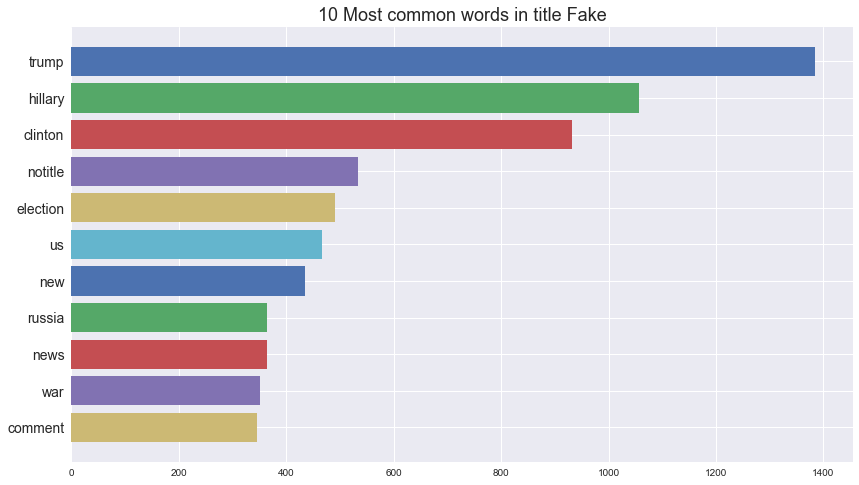

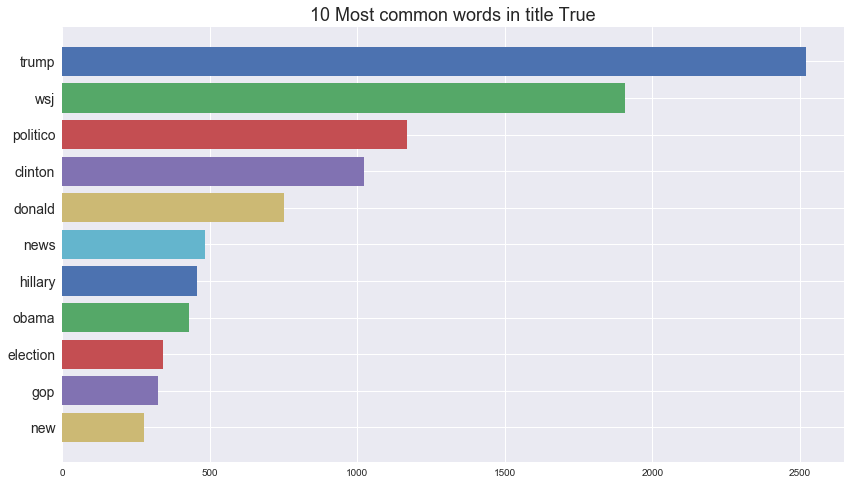

In [0]:
names = ["10 Most common words in title Fake", "10 Most common words in title True"]
variables = [most_common_fake, most_common_truth]

for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    
    for index, item in enumerate(var):
        if index > 10: break
        ax.barh(width=item[1], y=item[0])
        ax.invert_yaxis()
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.title(title, fontsize=18)
    plt.show()


###__ Tri-grams analysis__

In [0]:
# cleaning the title for fake news and returning the result as sentence 
corpus_text = [clean_text(i) for i in news[news['type'] == 'fake']['title'].tolist()]
# removal of stop words
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# save n-grams
ngrams_fake = {}
i=0
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    i+=1
    if i>30:
        break
    ngrams_fake[ng_text] = ng_count

In [0]:
corpus_text = [clean_text(i) for i in news[news['type'] == 'real']['title'].tolist()]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# save n-grams
ngrams_true = {}
i=0
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    i+=1
    if i>30:
        break
    ngrams_true[ng_text] = ng_count

In [0]:
print("TRIGRAMS TRUE")
ngrams_true

TRIGRAMS TRUE


{'political news and': 140,
 'news political news': 140,
 'news breaking news': 140,
 'news and updates': 140,
 'breaking news political': 140,
 'american news breaking': 140,
 'donald trump wsj': 33,
 'of donald trump': 27,
 'donald trump and': 24,
 'donald trump is': 23,
 'the white house': 22,
 'the supreme court': 22,
 'trump and the': 21,
 'for donald trump': 20,
 'trump and clinton': 18,
 'on donald trump': 18,
 'with donald trump': 17,
 'to donald trump': 17,
 'donald trump win': 17,
 'donald trump victory': 17,
 'in new york': 15,
 'trump victory wsj': 14,
 'trump american news': 14,
 'of the day': 14,
 'for hillary clinton': 14,
 'trump says he': 13,
 'takeaways from the': 13,
 'poll clinton leads': 13,
 'photos of the': 13,
 'new york city': 13}

In [0]:
print("TRIGRAMS FAKE")
ngrams_fake

TRIGRAMS FAKE


{'the onion america': 86,
 'onion america finest': 86,
 'finest news source': 86,
 'america finest news': 86,
 'russia news now': 58,
 'of the day': 42,
 'dakota access pipeline': 38,
 'new eastern outlook': 37,
 'hillary clinton is': 33,
 'endingfed news network': 33,
 'chart of the': 33,
 'at standing rock': 29,
 'the united states': 28,
 'syrian war report': 25,
 'paul craig roberts': 24,
 'of hillary clinton': 21,
 'war report november': 19,
 'daily contrarian reads': 19,
 'this is what': 18,
 'the end of': 18,
 'vineyard of the': 16,
 'the vineyard of': 16,
 'of the saker': 16,
 'november daily contrarian': 16,
 'hillary clinton and': 16,
 'comment on the': 16,
 'the white house': 15,
 'fbi email investigation': 15,
 'fbi director comey': 15,
 'by debbie menon': 15}

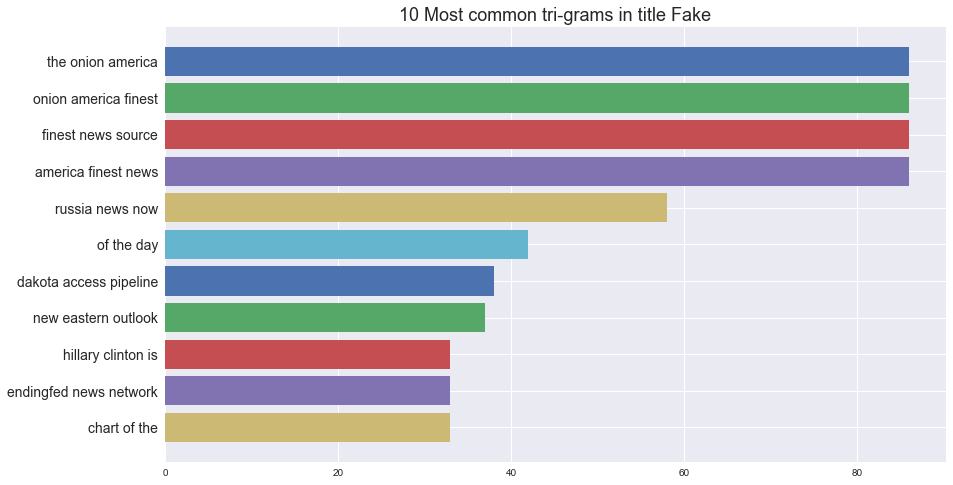

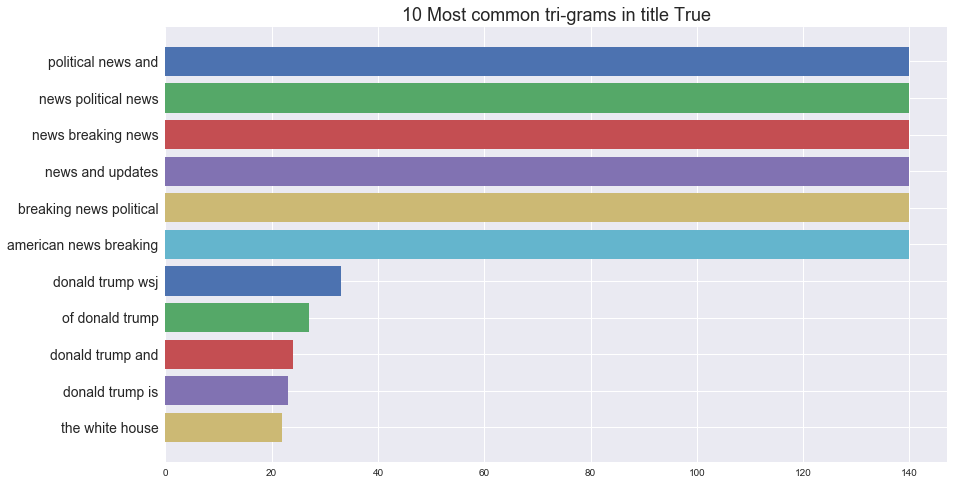

In [0]:
names = ["10 Most common tri-grams in title Fake", "10 Most common tri-grams in title True"]
variables = [ngrams_fake, ngrams_true]

for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    idx = 0
    for index, item in var.items():
        if idx > 10: break
        ax.barh(width=item, y=index)
        ax.invert_yaxis()
        idx += 1
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.title(title, fontsize=18)
    plt.show()

**Wordclouds for titles**

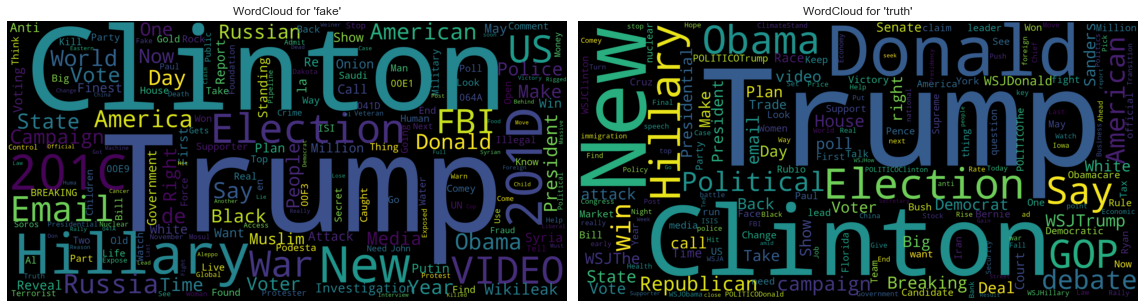

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

corpus_text = ''.join(news[news['type'] == 'fake']['title'].tolist())
corpus_text = re.sub('(043)\w+|(044)\w+', '', corpus_text)  
wordcloud = WordCloud(stopwords=stop_words, scale = 7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("WordCloud for 'fake'")

corpus_text = ''.join(news[news['type'] == 'real']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("WordCloud for 'truth'")

plt.tight_layout()

#### In the content

In [0]:
stop_words = STOPWORDS.union(set(["will", "one", "new"])) #Most common words in all

In [0]:
corpus_text = [clean_text_array(i) for i in news[news['type'] == 'fake']['text'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]
c = Counter(corpus_text)
most_common_fake = c.most_common(20)

corpus_text = [clean_text_array(i) for i in news[news['type'] == 'real']['text'].tolist()]
corpus_text = [item for sublist in corpus_text for item in sublist]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]
c = Counter(corpus_text)
most_common_truth = c.most_common(20)


In [0]:
most_common_truth

[('trump', 51157),
 ('said', 39906),
 ('mr', 27073),
 ('clinton', 27055),
 ('president', 14713),
 ('campaign', 14604),
 ('people', 12003),
 ('state', 11387),
 ('obama', 10766),
 ('republican', 10691),
 ('election', 10005),
 ('u', 9593),
 ('party', 8028),
 ('donald', 7991),
 ('voters', 7830),
 ('house', 7619),
 ('two', 7519),
 ('time', 7516),
 ('states', 7420),
 ('presidential', 7411)]

In [0]:
most_common_fake

[('trump', 20491),
 ('clinton', 19696),
 ('people', 16990),
 ('us', 15974),
 ('hillary', 12960),
 ('said', 12405),
 ('now', 10156),
 ('world', 9560),
 ('time', 9072),
 ('state', 8998),
 ('even', 8891),
 ('president', 8778),
 ('election', 8613),
 ('government', 8511),
 ('de', 8323),
 ('many', 8309),
 ('obama', 8059),
 ('war', 7957),
 ('u', 7440),
 ('russia', 7195)]

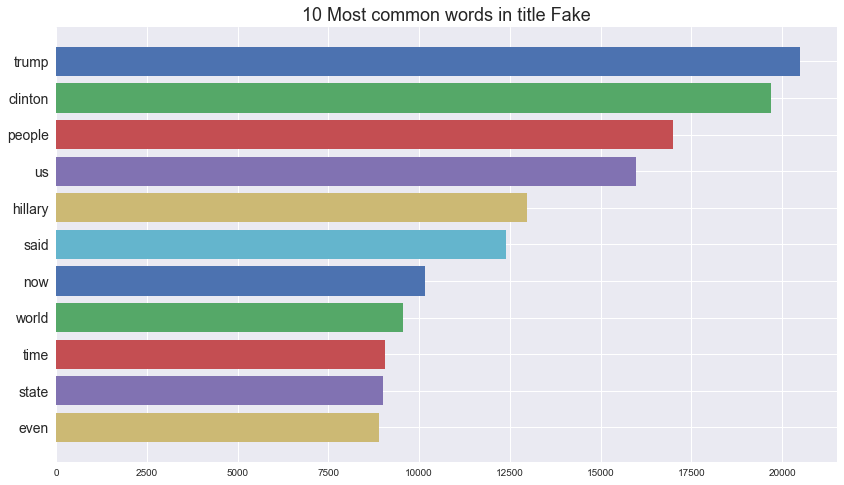

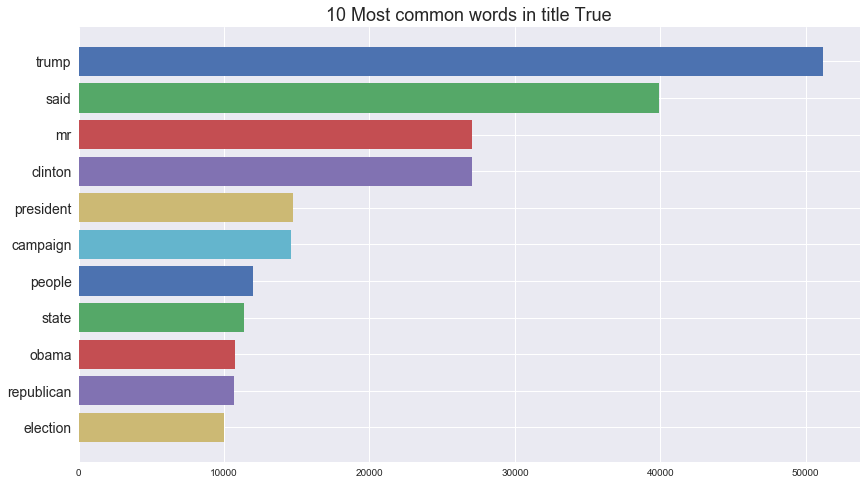

In [0]:
names = ["10 Most common words in title Fake", "10 Most common words in title True"]
variables = [most_common_fake, most_common_truth]

for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    
    for index, item in enumerate(var):
        if index > 10: break
        ax.barh(width=item[1], y=item[0])
        ax.invert_yaxis()
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.title(title, fontsize=18)
    plt.show()

#### Tri-grams most used

In [0]:
news_lite = news.head(2000) #Version reducida para que no tarde tanto

In [0]:
corpus_text = [clean_text(i) for i in news_lite[news_lite['type'] == 'fake']['text'].tolist()]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# save n-grams
ngrams_fake = {}
i=0
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    i+=1
    if i>30:
        break
    ngrams_fake[ng_text] = ng_count

In [0]:
corpus_text = [clean_text(i) for i in news_lite[news_lite['type'] == 'real']['text'].tolist()]
corpus_text = [w.lower().strip() for w in corpus_text if w.lower().strip() not in stop_words ]

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(corpus_text)

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# save n-grams
ngrams_true = {}
i=0
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    i+=1
    if i>30:
        break
    ngrams_true[ng_text] = ng_count

In [0]:
print("TRIGRAMS TRUE")
ngrams_true

TRIGRAMS TRUE


{'the united states': 312,
 'the new york': 256,
 'the white house': 244,
 'one of the': 230,
 'story continued below': 158,
 'new york times': 154,
 'thomas wright by': 146,
 'by thomas wright': 146,
 'by joshua zeitz': 146,
 'by bill scher': 143,
 'bill scher by': 143,
 'secretary of state': 128,
 'as well as': 120,
 'according to the': 114,
 'going to be': 107,
 'by jack shafer': 107,
 'joshua zeitz by': 106,
 'the end of': 104,
 'mr trump has': 104,
 'out of the': 103,
 'of the new': 103,
 'president barack obama': 102,
 'of mr trump': 101,
 'the republican party': 99,
 'the obama administration': 96,
 'that mr trump': 96,
 'some of the': 94,
 'the supreme court': 88,
 'part of the': 87,
 'president donald trump': 85}

In [0]:
print("TRIGRAMS FAKE")
ngrams_fake

TRIGRAMS FAKE


{'the united states': 391,
 'one of the': 281,
 'secretary of state': 170,
 'as well as': 168,
 'according to the': 157,
 'the white house': 148,
 'in order to': 148,
 'the fact that': 136,
 'the clinton foundation': 133,
 'of the united': 125,
 'out of the': 123,
 'part of the': 108,
 'there is no': 106,
 'the american people': 105,
 'the end of': 104,
 'some of the': 102,
 'the clinton campaign': 100,
 'of the world': 100,
 'in the world': 100,
 'this is the': 95,
 'be able to': 95,
 'of the most': 93,
 'the middle east': 90,
 'in the united': 88,
 'the rest of': 85,
 'end of the': 80,
 'the federal reserve': 77,
 'new york times': 77,
 'around the world': 75,
 'is going to': 74}

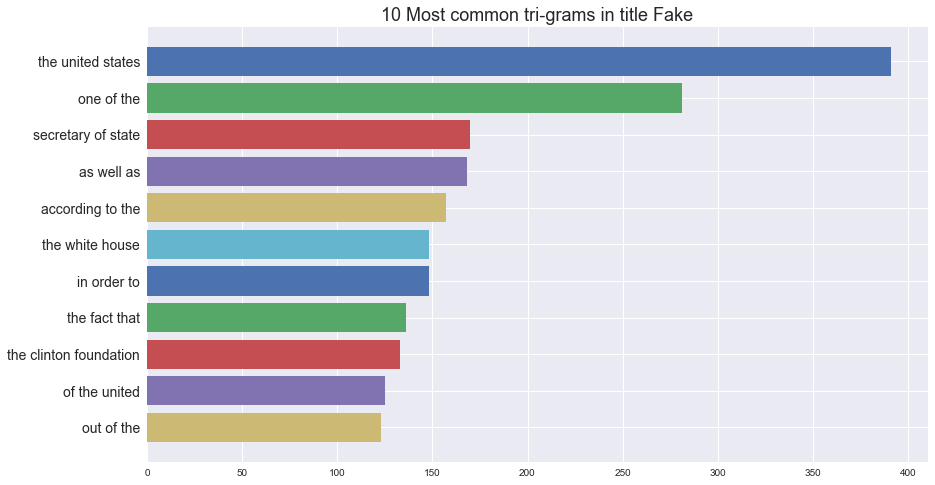

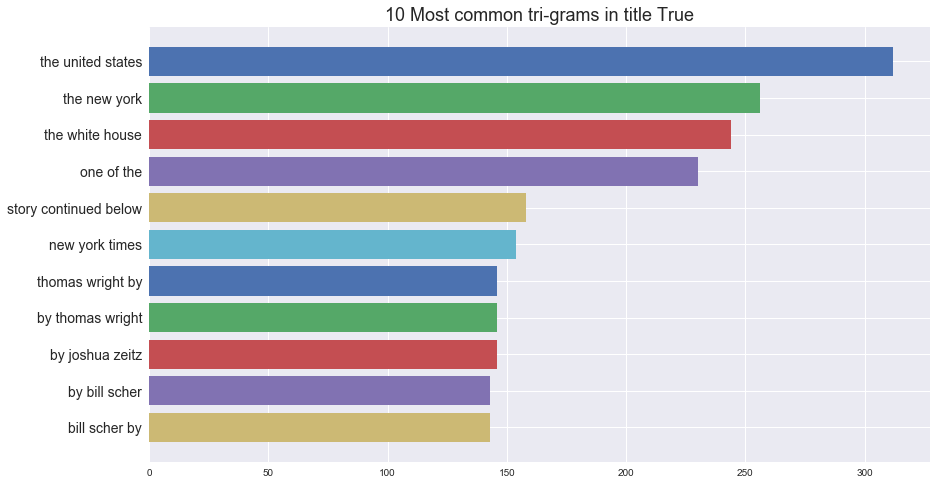

In [0]:
names = ["10 Most common tri-grams in title Fake", "10 Most common tri-grams in title True"]
variables = [ngrams_fake, ngrams_true]

for title, var in zip(names, variables):
    fig, ax = plt.subplots(figsize=(14,8))
    idx = 0
    for index, item in var.items():
        if idx > 10: break
        ax.barh(width=item, y=index)
        ax.invert_yaxis()
        idx += 1
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.title(title, fontsize=18)
    plt.show()

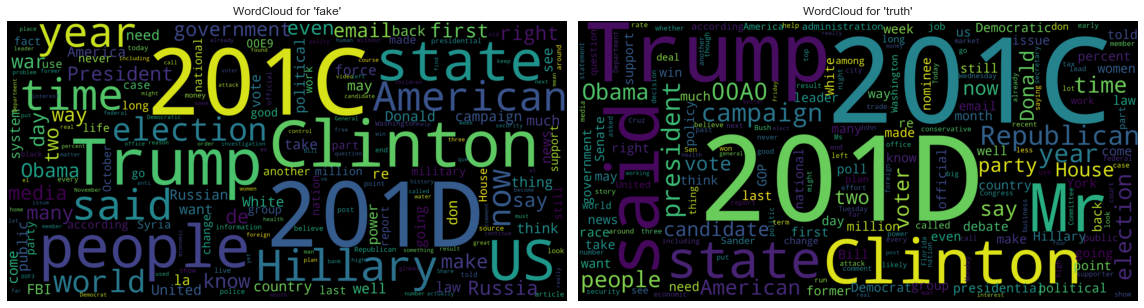

In [0]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

corpus_text = ''.join(news[news['type'] == 'fake']['text'].tolist())
corpus_text = re.sub('(043)\w+|(044)\w+', '', corpus_text)  
wordcloud = WordCloud(stopwords=stop_words, scale = 7, collocations=False).generate(corpus_text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("WordCloud for 'fake'")

corpus_text = ''.join(news[news['type'] == 'real']['text'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 7, collocations=False).generate(corpus_text)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("WordCloud for 'truth'")

plt.tight_layout()

** Length in news words **

To do this, you have to tokenize and clean the text

In [0]:
news['clean_content'] = news.swifter.apply(lambda row: clean_text(row['text']), axis=1)
news['clean_title'] = news.swifter.apply(lambda row: clean_text(row['title']), axis=1)

In [0]:
news['len_content'] = news.swifter.apply(lambda row: len(row['clean_content']), axis=1)

Text(0.5, 0.98, '')

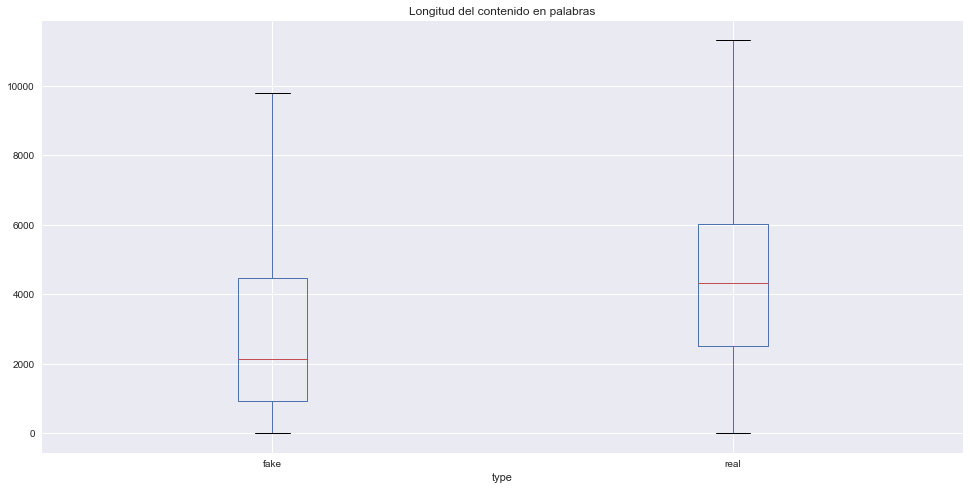

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Length of content in words")
plt.suptitle("")

In [0]:
news = news.drop(["clean_content", "clean_title","len_content"], axis=1)

** Average length of sentences **

In [0]:
corpus_text = '. '.join([i for i in news[news['type'] == 'fake']['text'].tolist()])
corpus_text = split_phrases(corpus_text)
lengths_fake = [len(tokenize(s)) for s in corpus_text]

corpus_text = '. '.join([i for i in news[news['type'] == 'real']['text'].tolist()])
corpus_text = split_phrases(corpus_text)
lengths_truth = [len(tokenize(s)) for s in corpus_text]


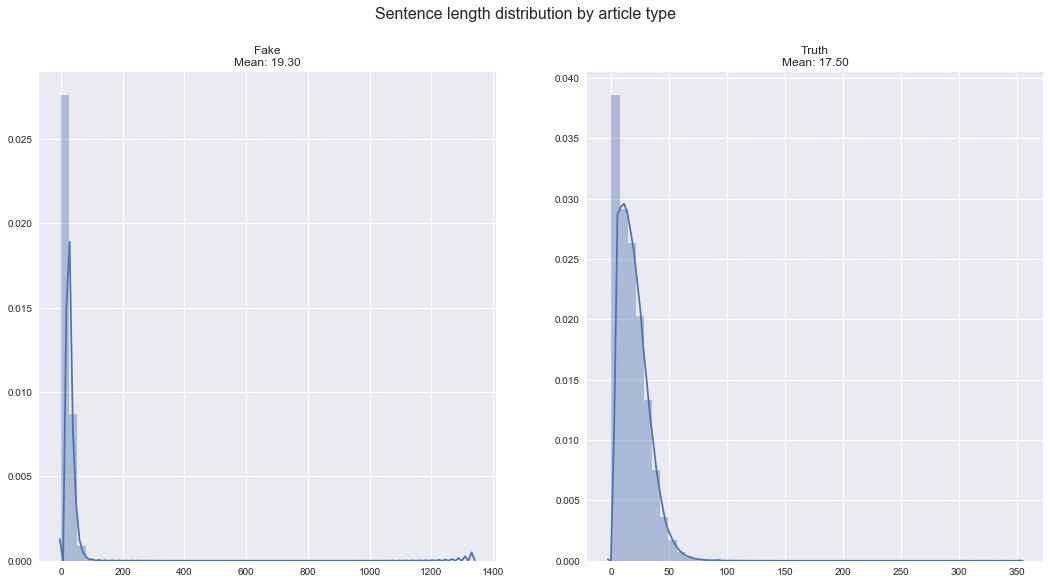

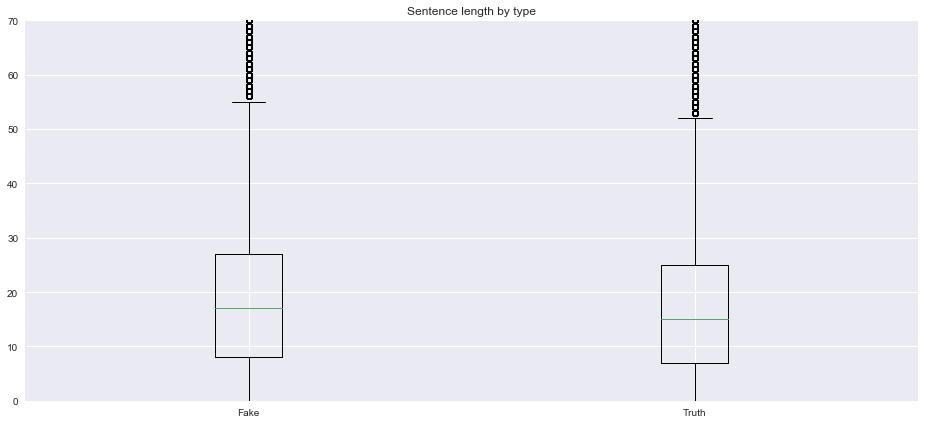

In [0]:
fig, ax = plt.subplots(1,2, figsize=(18,9))
fig.suptitle("Sentence length distribution by article type", size=16)

sns.distplot(lengths_fake, ax=ax[0])
ax[0].set_title("Fake\nMean: {0:.2f}".format(np.average(lengths_fake)))


sns.distplot(lengths_truth, ax=ax[1])
ax[1].set_title("Truth\nMean: {0:.2f}".format(np.average(lengths_truth)))

plt.show()


#Boxplot
fig, ax = plt.subplots(1,1, figsize=(16,7))
plt.title("Sentence length by type")
plt.ylim((0,70))
plt.boxplot([lengths_fake, lengths_truth], 
            labels=['Fake', 'Truth'])
plt.show()

** Length in news phrases **

In [0]:
news['len_content'] = news.swifter.apply(lambda row: len(row['text'].split(". ")), axis=1)

Text(0.5, 0.98, '')

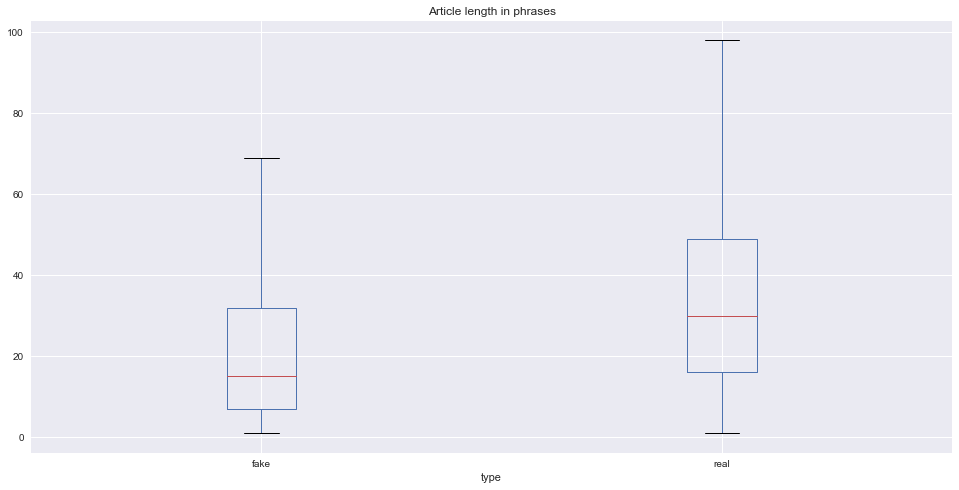

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Article length in phrases")
plt.suptitle("")

** Exclamation / question marks by news types **

In [0]:
news['len_content'] = news.text.str.count("!|\?")

Text(0.5, 0.98, '')

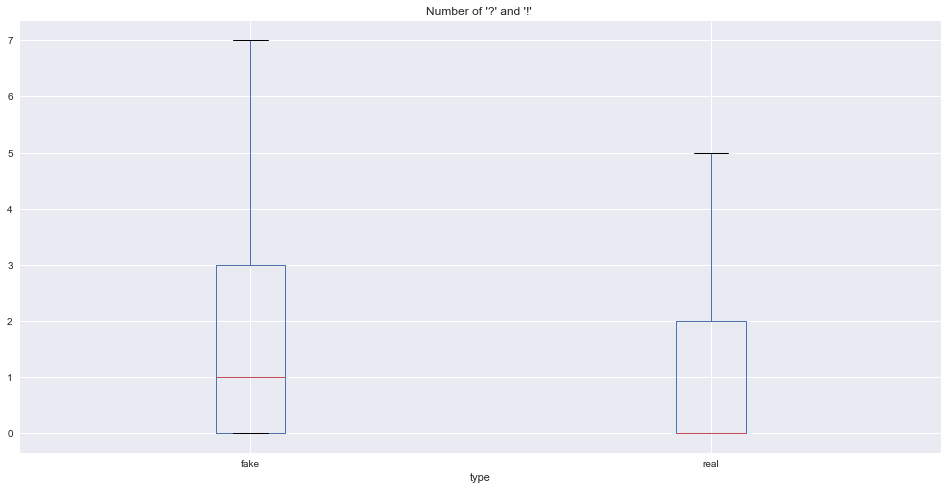

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Number of '?' and '!' ")
plt.suptitle("")

In [0]:
news=news.drop(['len_content'], axis=1)

## Psychological analysis

Analyze the news by people use:

* first person : *I, me, my, mine, we, usk our, ours*
* Second person: *you, you, your, yours*
* Third person: *he, she, his, her, him, his, hers, they, them, their, theirs*

In [0]:
def count_person_forms(text, person):
    """
    Count the occurrences of person tokens in the text
    """
    text = tokenize(text.lower())
    counter = 0
    for word in text:
        if word in person:
            counter += 1
    return counter       

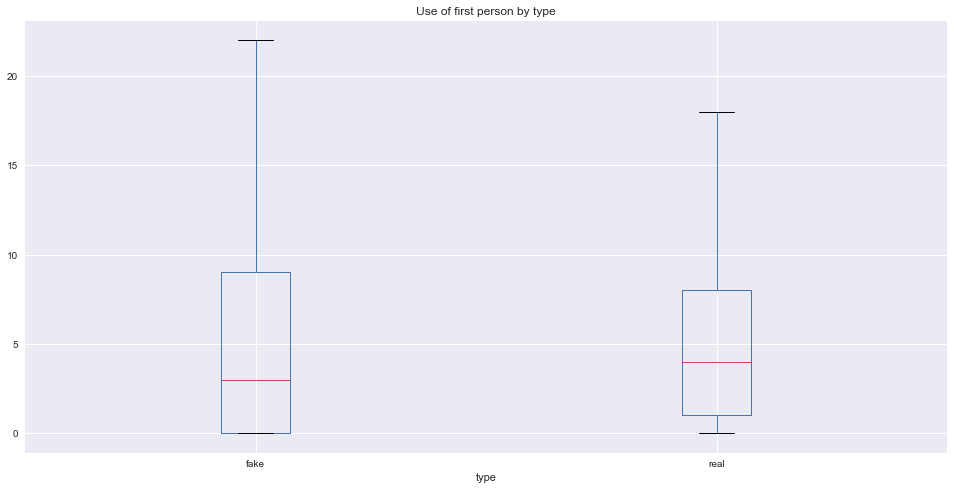

In [0]:
first_person = ["i", "me", "mine", "we", "us", "our", "ours"]
second_person = ["you", "your", "yours"]

news['first_person'] = news.swifter.apply(lambda row: count_person_forms(row['text'], first_person), axis=1)
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['first_person'], by='type', ax=ax, showfliers=False)
ax.set_title("Use of first person by type")
fig.suptitle("")
plt.show()

In [0]:
news.groupby('type')['first_person'].mean()

type
fake    8.460282
real    6.767754
Name: first_person, dtype: float64

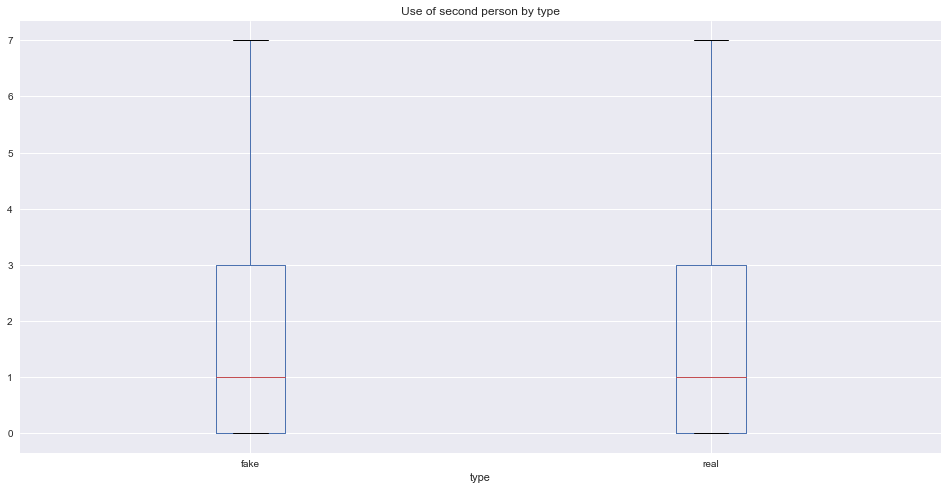

In [0]:
news['second_person'] = news.swifter.apply(lambda row: count_person_forms(row['text'], second_person), axis=1)
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['second_person'], by='type', ax=ax, showfliers=False)
ax.set_title("Use of second person by type")
fig.suptitle("")
plt.show()

In [0]:
news=news.drop(['first_person'], axis=1)
news=news.drop(['second_person'], axis=1)

## Sentiment analysis

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def classify_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    text = text.replace("\n\n", ". ").replace("\n", ". ")
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    pol = sid.polarity_scores(text)['compound']
    return pol

In [0]:
news['sent'] = news.swifter.apply(lambda r: classify_sentiment(r['text']), axis=1)

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\91998/nltk_data'
    - 'c:\\users\\91998\\appdata\\local\\programs\\python\\python37\\nltk_data'
    - 'c:\\users\\91998\\appdata\\local\\programs\\python\\python37\\share\\nltk_data'
    - 'c:\\users\\91998\\appdata\\local\\programs\\python\\python37\\lib\\nltk_data'
    - 'C:\\Users\\91998\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


KeyError: 'Column not found: sent'

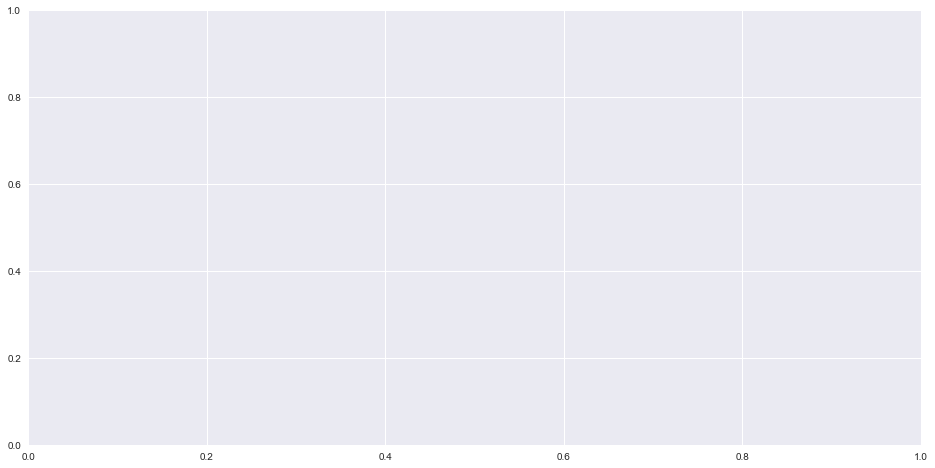

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['sent'], by='type', ax=ax, showfliers=False)
ax.set_title("Sentiment analysis by type")
fig.suptitle("")
plt.show()

## Vocabulary diversity analysis

$ l = \ frac {| t |} {| T |} $

Being
* $ t $ the text
* $ T $ the set of words (without repetition) in the text

In [0]:
def lexical_diversity(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    text = tokenize(text.lower())
    if len(text) == 0:
        return 0
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [0]:
news['lexical_diver'] = news.swifter.apply(lambda r: lexical_diversity(r['text']), axis=1)

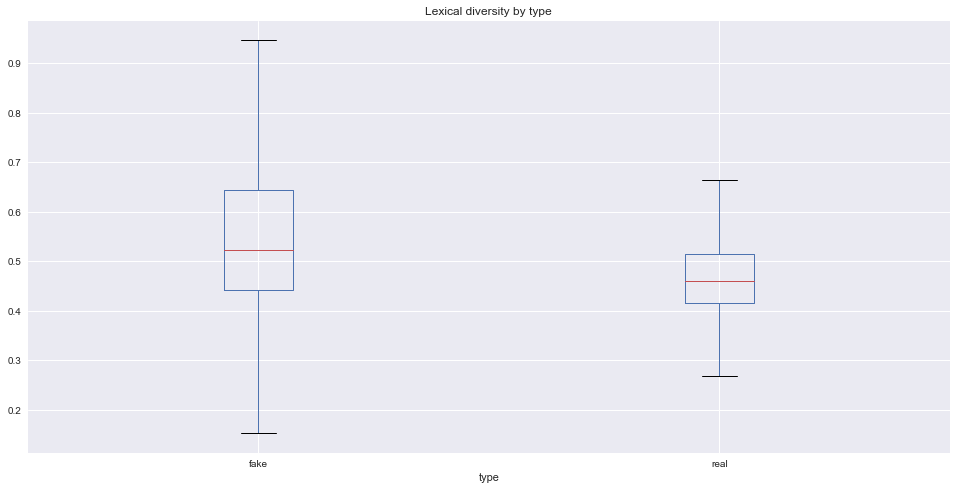

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
ax = news.boxplot(column=['lexical_diver'], by='type', ax=ax, showfliers=False)
ax.set_title("Lexical diversity by type")
fig.suptitle("")
plt.show()

In [0]:
news.groupby('type')['lexical_diver'].mean()

type
fake    0.560433
real    0.483817
Name: lexical_diver, dtype: float64